### **Etapa 8**

La empresa cuenta con un sitio web y para fomentar el uso del canal de venta online, se requiere la implementación de un sistema de recomendación.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
from IPython.display import clear_output

Se utiliza el archivo de encuestas de ventas:

In [3]:
df_encuestas = pd.read_csv("Datasets/Venta_Encuestas.csv", sep=",")

In [4]:
df_encuestas.head()

,IdCliente,IdProducto,Ponderacion
0,1.0,42786,1
1,1.0,42787,4
2,1.0,42823,4
3,1.0,42881,1
4,1.0,42884,5


In [5]:
df_encuestas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17207 entries, 0 to 17206
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IdCliente    17122 non-null  float64
 1   IdProducto   17207 non-null  int64  
 2   Ponderacion  17207 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 403.4 KB


Se filtran solo los registros sin nulos:

In [6]:
df_encuestas.dropna(inplace=True)

In [7]:
df_encuestas.shape

(17122, 3)

In [8]:
df_encuestas.describe()

,IdCliente,IdProducto,Ponderacion
count,17122.000000,17122.000000,17122.000000
mean,1492.432309,42900.842717,3.950824
std,965.504330,83.615247,1.109047
min,1.000000,42737.000000,1.000000
25%,689.000000,42832.000000,3.000000
50%,1353.000000,42902.000000,4.000000
75%,2236.500000,42973.000000,5.000000
max,3407.000000,43043.000000,5.000000


Cantidad de clientes:

In [9]:
len(df_encuestas.IdCliente.unique())

2953

Cantidad de productos:

In [10]:
len(df_encuestas.IdProducto.unique())

283

Distribución de las ponderaciones

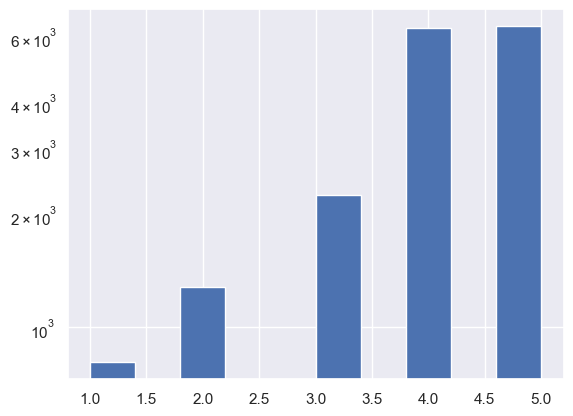

In [11]:
plt.hist(df_encuestas.Ponderacion, log= True)
plt.show()

In [30]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

In [31]:
reader = Reader(rating_scale=(1, 5))

In [32]:
data = Dataset.load_from_df(df_encuestas[['IdCliente', 'IdProducto', 'Ponderacion']], reader)

In [33]:
trainset, testset = train_test_split(data, test_size=.25)

In [34]:
from surprise import SVD
svd = SVD(verbose=True, n_epochs=10)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1321  1.1272  1.1243  1.1278  0.0032  
MAE (testset)     0.8705  0.8635  0.8634  0.8658  0.0033  
Fit time          0.28    0.31    0.33    0.31    0.02    
Test time         0.05    0.03    0.04    0.04    0.01    


{'test_rmse': array([1.13206669, 1.12715626, 1.1243162 ]),
 'test_mae': array([0.87054045, 0.86347856, 0.86344305]),
 'fit_time': (0.28213071823120117, 0.30894923210144043, 0.32932066917419434),
 'test_time': (0.04622459411621094, 0.03380250930786133, 0.03699755668640137)}

In [35]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9


In [36]:
predictions = svd.test(testset)

In [37]:
predictions[1]

Prediction(uid=547.0, iid=42953, r_ui=5.0, est=4.105774166605593, details={'was_impossible': False})

Se visualiza la predicción para un cliente/producto en particular

In [51]:
svd.predict(1,42755)

Prediction(uid=1, iid=42755, r_ui=None, est=3.5674132016335838, details={'was_impossible': False})

In [80]:
def generar_recommendacion(algo, id_cliente, top=5):
    """
    Muestra los top productos recomendados
    """
    lista_productos_id = []
    lista_productos_desc = []
    lista_productos_pond = []
    
    df_productos = pd.read_csv("Datasets/Productos.csv", sep=",", encoding="ansi")
    df_productos.drop(['Tipo','Precio'], axis=1,inplace=True)
    df_productos.rename(columns = {'ID_PRODUCTO': 'IdProducto'}, inplace = True)
    df_productos.dropna(inplace=True)
    for prod in df_productos.IdProducto.unique():
        lista_productos_id.append(prod)
        lista_productos_pond.append(algo.predict(id_cliente,prod)[3])
            
    lst = list(zip(lista_productos_id, lista_productos_pond))
    df = pd.DataFrame(lst , columns = ['IdProducto','Ponderacion'])
    df = df.sort_values(by=['Ponderacion'], ascending=False).reset_index()
    df.drop(columns=['index'],inplace=True)
    df = pd.merge(df, df_productos, on='IdProducto', how='left')
    
    return df.head(top)

Recomendaciones para el cliente N_cli

In [82]:
N_cli = 1
generar_recommendacion(svd, N_cli)

,IdProducto,Ponderacion,Concepto
0,42813,4.327232,CD DVD+-RW 24X SAMSUNG SATA BLACK
1,42797,4.221772,MEM DDR4 16GB 2400MHZ MUSHKIN BLACKLINE
2,42918,4.183576,FUNDA PARA TABLET CASE LOGIC CEUE-1107
3,42943,4.168086,MOCHILA NOTEBOOK CASE LOGIC IBIR-115 BLACK
4,42776,4.095600,HD SSD 120GB SANDISK SATA 2.5
